In [28]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import date, timedelta
import warnings

In [2]:
#  !pip install pandas-montecarlo

In [29]:
warnings.filterwarnings(action='once')

In [3]:
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 50)

In [4]:
%matplotlib inline

In [5]:
today = date.today() - timedelta(2)
two_days_ago = today.strftime("%Y%m%d")
print(two_days_ago)
file_name = 'xhl_stats.{}.csv'.format(two_days_ago)
url = 'http://stats.betfairgames.com/xhlstats/{}'.format(file_name)
print(url) 
output_file = 'data/{}'.format(file_name)
response = requests.get(url, allow_redirects=True)
open(output_file, 'wb').write(response.content)

20200406
http://stats.betfairgames.com/xhlstats/xhl_stats.20200406.csv


1043440

In [6]:
higher_3_starting_back_odds = float(2.34)
higher_3_starting_lay_odds = float(2.36)
higher_4_starting_odds = float(3.15)

stake = float(10.00)

In [7]:
column_names = [ 'game_type', 'game_stream_id', 'market_id', 'date_time', 'round_settled', 
                'selection_id', 'selection_name', 'win_lose', 'result', 'card_revealed']

In [8]:
# file_range = glob.glob('data/xhl_stats.20190[0-3]*.csv')
file_range = glob.glob('data/*.csv')

In [9]:
# data = pd.read_csv('*.csv', names=column_names)
data = pd.concat([pd.read_csv(f, names=column_names) for f in file_range], ignore_index = True).drop_duplicates()
data.head()

,game_type,game_stream_id,market_id,date_time,round_settled,selection_id,selection_name,win_lose,result,card_revealed
0,HiLo Standard,1444093,39907968,11/12/2019 00:00,8,1032017,Card 1 or further,W,1,"50,40,45,49,43,46,44"
1,HiLo Standard,1444093,39907968,11/12/2019 00:00,8,1032018,Card 2 or further,W,1,"50,40,45,49,43,46,44"
2,HiLo Standard,1444093,39907968,11/12/2019 00:00,8,1032019,Card 3 or further,W,1,"50,40,45,49,43,46,44"
3,HiLo Standard,1444093,39907968,11/12/2019 00:00,8,1032020,Card 4 or further,W,1,"50,40,45,49,43,46,44"
4,HiLo Standard,1444093,39907968,11/12/2019 00:00,8,1032021,Card 5 or further,W,1,"50,40,45,49,43,46,44"


In [10]:
turbo_hilo_data = data[data['game_type'] == 'HiLo Turbo']
turbo_hilo_data.tail()

,game_type,game_stream_id,market_id,date_time,round_settled,selection_id,selection_name,win_lose,result,card_revealed
4502325,HiLo Turbo,1444096,39831416,08/12/2019 23:57,6,1032028,2 Card Run,W,1,"51,41,42,43,40"
4502326,HiLo Turbo,1444096,39831416,08/12/2019 23:57,6,1032029,3 Card Run,W,1,"51,41,42,43,40"
4502327,HiLo Turbo,1444096,39831416,08/12/2019 23:57,6,1032030,4 Card Run,L,0,"51,41,42,43,40"
4502328,HiLo Turbo,1444096,39831416,08/12/2019 23:57,6,1032031,No Ace,W,1,"51,41,42,43,40"
4502329,HiLo Turbo,1444096,39831416,08/12/2019 23:57,6,1032032,No Picture Cards,L,0,"51,41,42,43,40"


In [11]:
card_3_or_further = turbo_hilo_data[turbo_hilo_data['selection_name'] == 'Card 3 or further']
card_3_or_further['date_time_obj'] = pd.to_datetime(card_3_or_further['date_time'], format="%d/%m/%Y %H:%M")
card_3_or_further = card_3_or_further.sort_values(['date_time_obj'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
card_3_or_further.head()

,game_type,game_stream_id,market_id,date_time,round_settled,selection_id,selection_name,win_lose,result,card_revealed,date_time_obj
4209315,HiLo Turbo,1444096,27026188,01/01/2019 00:00,5,1032019,Card 3 or further,L,0,"45,50,42,40",2019-01-01 00:00:00
4209347,HiLo Turbo,1444096,27026296,01/01/2019 00:06,10,1032019,Card 3 or further,W,1,"42,47,41,49,44,39,51,48,50",2019-01-01 00:06:00
4209384,HiLo Turbo,1444096,27026476,01/01/2019 00:12,12,1032019,Card 3 or further,W,1,"45,51,49,47,41,42,44,48,43,39,50,40,46",2019-01-01 00:12:00
4209417,HiLo Turbo,1444096,27026603,01/01/2019 00:18,3,1032019,Card 3 or further,L,0,"48,39",2019-01-01 00:18:00
4209460,HiLo Turbo,1444096,27026724,01/01/2019 00:24,9,1032019,Card 3 or further,W,1,"39,46,44,50,45,51,43,41",2019-01-01 00:24:00


In [13]:
card_3_or_further.tail()

,game_type,game_stream_id,market_id,date_time,round_settled,selection_id,selection_name,win_lose,result,card_revealed,date_time_obj
173921,HiLo Turbo,1444096,44419444,06/04/2020 23:27,5,1032019,Card 3 or further,L,0,"42,45,47,44",2020-04-06 23:27:00
173953,HiLo Turbo,1444096,44419550,06/04/2020 23:30,12,1032019,Card 3 or further,W,1,"41,51,44,39,47,46,43,50,49,48,40,42,45",2020-04-06 23:30:00
173969,HiLo Turbo,1444096,44419595,06/04/2020 23:34,11,1032019,Card 3 or further,W,1,"42,50,46,51,43,45,39,48,44,41",2020-04-06 23:34:00
174065,HiLo Turbo,1444096,44419966,06/04/2020 23:50,7,1032019,Card 3 or further,W,1,"41,42,45,50,49,51",2020-04-06 23:50:00
174086,HiLo Turbo,1444096,44420089,06/04/2020 23:53,12,1032019,Card 3 or further,W,1,"43,39,41,42,45,48,44,47,50,40,51,49,46",2020-04-06 23:53:00


In [14]:
def back_profit_loss(win_lose):
    if win_lose == 'W':
        return  float((higher_3_starting_back_odds * stake) - stake * 0.98)
    else:
        return float(-1 * stake)

In [15]:
(back_profit_loss('W'), back_profit_loss('L'))

(13.599999999999998, -10.0)

In [16]:
def laying_profit_loss(win_lose):
    if win_lose == 'W':
        return  float(-1 * (higher_3_starting_lay_odds * stake) + stake) 
    else:
        return float(stake * 0.98)

In [17]:
(laying_profit_loss('W'), laying_profit_loss('L'))

(-13.599999999999998, 9.8)

In [18]:
pl_lay_data =  card_3_or_further.apply(lambda x: (laying_profit_loss(x['win_lose'])),axis=1).to_frame(name='laying_profit_loss')
pl_lay_data.head()

,laying_profit_loss
4209315,9.8
4209347,-13.6
4209384,-13.6
4209417,9.8
4209460,-13.6


In [19]:
pl_back_data =  card_3_or_further.apply(lambda x: (back_profit_loss(x['win_lose'])),axis=1).to_frame(name='backing_profit_loss')
pl_back_data.head()

,backing_profit_loss
4209315,-10.0
4209347,13.6
4209384,13.6
4209417,-10.0
4209460,13.6


In [20]:
pl_lay_data['cum_profit_laying'] = pl_lay_data.cumsum()
pl_lay_data.head()

,laying_profit_loss,cum_profit_laying
4209315,9.8,9.8
4209347,-13.6,-3.8
4209384,-13.6,-17.4
4209417,9.8,-7.6
4209460,-13.6,-21.2


In [21]:
pl_back_data['cum_profit_backing'] = pl_back_data.cumsum()
pl_back_data.head()

,backing_profit_loss,cum_profit_backing
4209315,-10.0,-10.0
4209347,13.6,3.6
4209384,13.6,17.2
4209417,-10.0,7.2
4209460,13.6,20.8


In [22]:
joined_pl_data = card_3_or_further.join(pl_lay_data).join(pl_back_data)
joined_pl_data.head()

,game_type,game_stream_id,market_id,date_time,round_settled,selection_id,selection_name,win_lose,result,card_revealed,date_time_obj,laying_profit_loss,cum_profit_laying,backing_profit_loss,cum_profit_backing
4209315,HiLo Turbo,1444096,27026188,01/01/2019 00:00,5,1032019,Card 3 or further,L,0,"45,50,42,40",2019-01-01 00:00:00,9.8,9.8,-10.0,-10.0
4209347,HiLo Turbo,1444096,27026296,01/01/2019 00:06,10,1032019,Card 3 or further,W,1,"42,47,41,49,44,39,51,48,50",2019-01-01 00:06:00,-13.6,-3.8,13.6,3.6
4209384,HiLo Turbo,1444096,27026476,01/01/2019 00:12,12,1032019,Card 3 or further,W,1,"45,51,49,47,41,42,44,48,43,39,50,40,46",2019-01-01 00:12:00,-13.6,-17.4,13.6,17.2
4209417,HiLo Turbo,1444096,27026603,01/01/2019 00:18,3,1032019,Card 3 or further,L,0,"48,39",2019-01-01 00:18:00,9.8,-7.6,-10.0,7.2
4209460,HiLo Turbo,1444096,27026724,01/01/2019 00:24,9,1032019,Card 3 or further,W,1,"39,46,44,50,45,51,43,41",2019-01-01 00:24:00,-13.6,-21.2,13.6,20.8


In [23]:
grouped_data = joined_pl_data.groupby(['win_lose']).sum()
grouped_data.head()

,game_stream_id,laying_profit_loss,cum_profit_laying,backing_profit_loss,cum_profit_backing
win_lose,,,,,
L,119779098624,812851.2,-1.281e+09,-829440.0,5.928e+08
W,89435753472,-842275.2,-9.555e+08,842275.2,4.427e+08


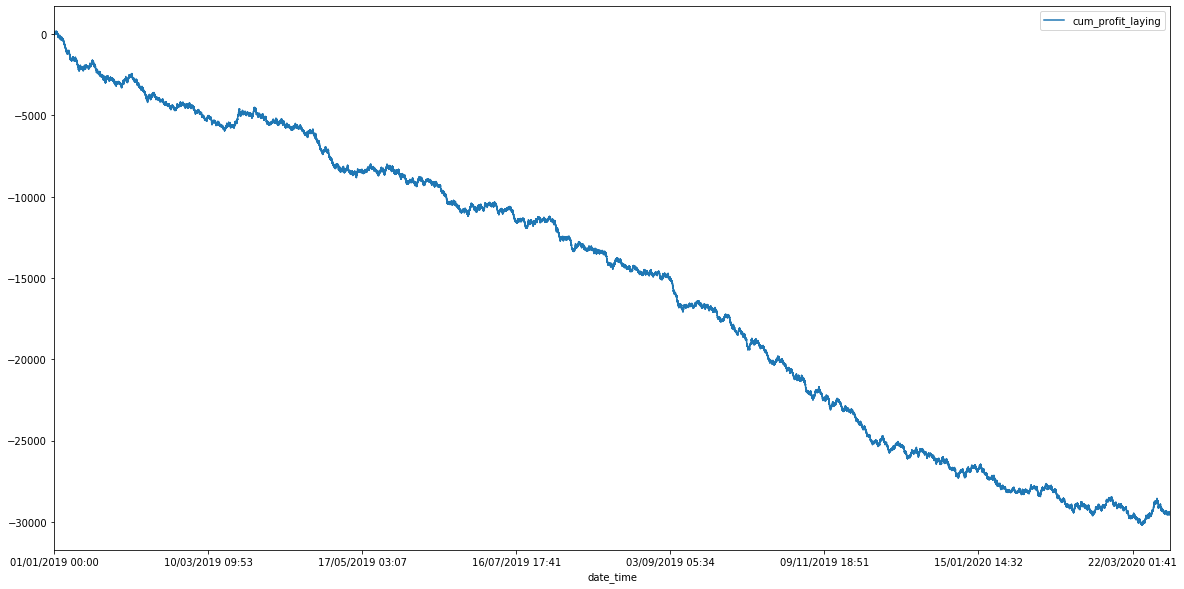

In [24]:
joined_pl_data.plot(x='date_time', y='cum_profit_laying',figsize=(20, 10))

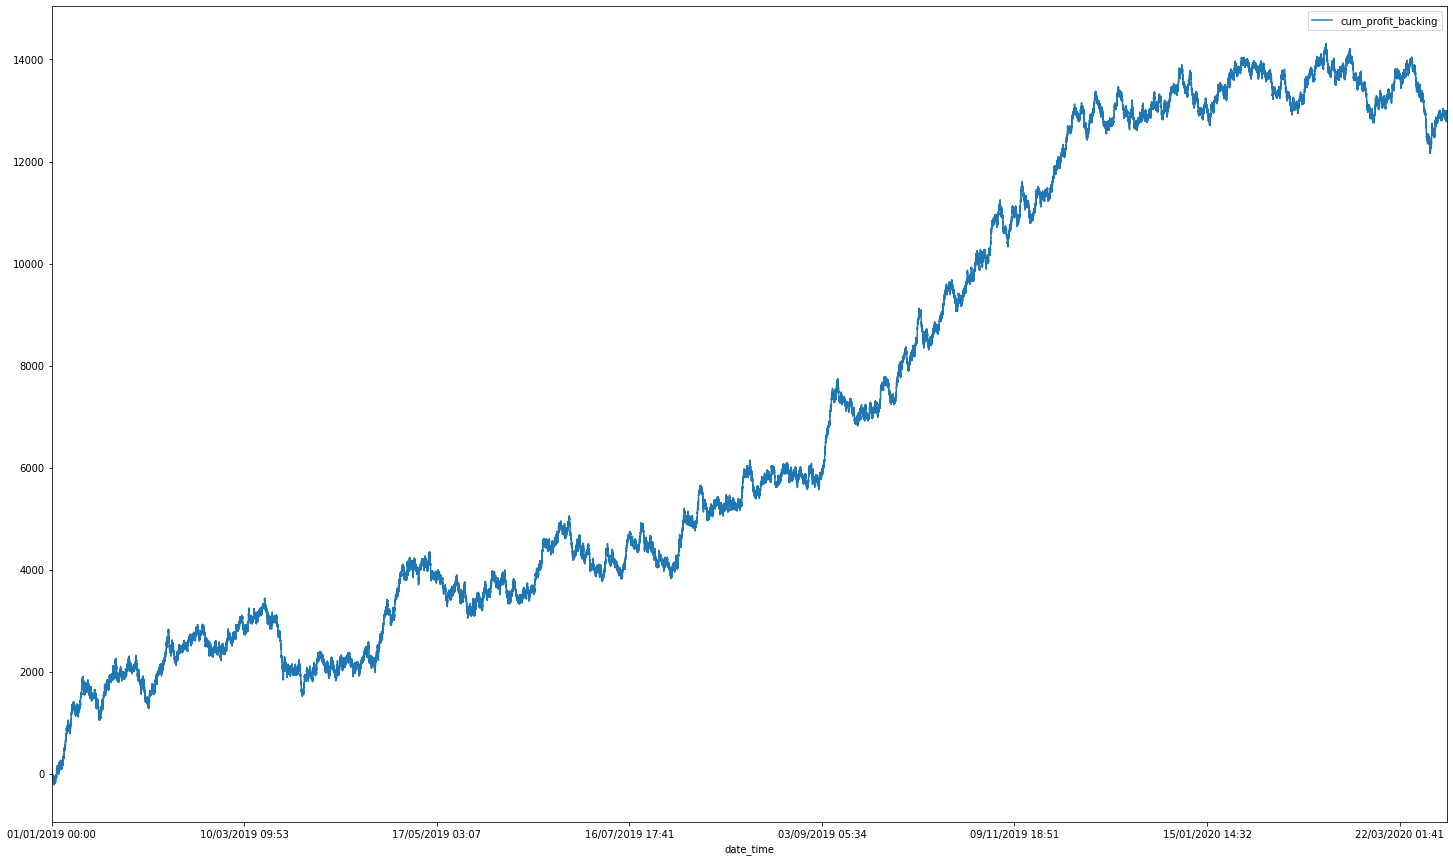

In [25]:
joined_pl_data.plot(x='date_time', y='cum_profit_backing',figsize=(25, 15))

In [43]:
import pandas_montecarlo
mc = joined_pl_data['backing_profit_loss'].montecarlo(sims=25, bust=-0.1, goal=1)

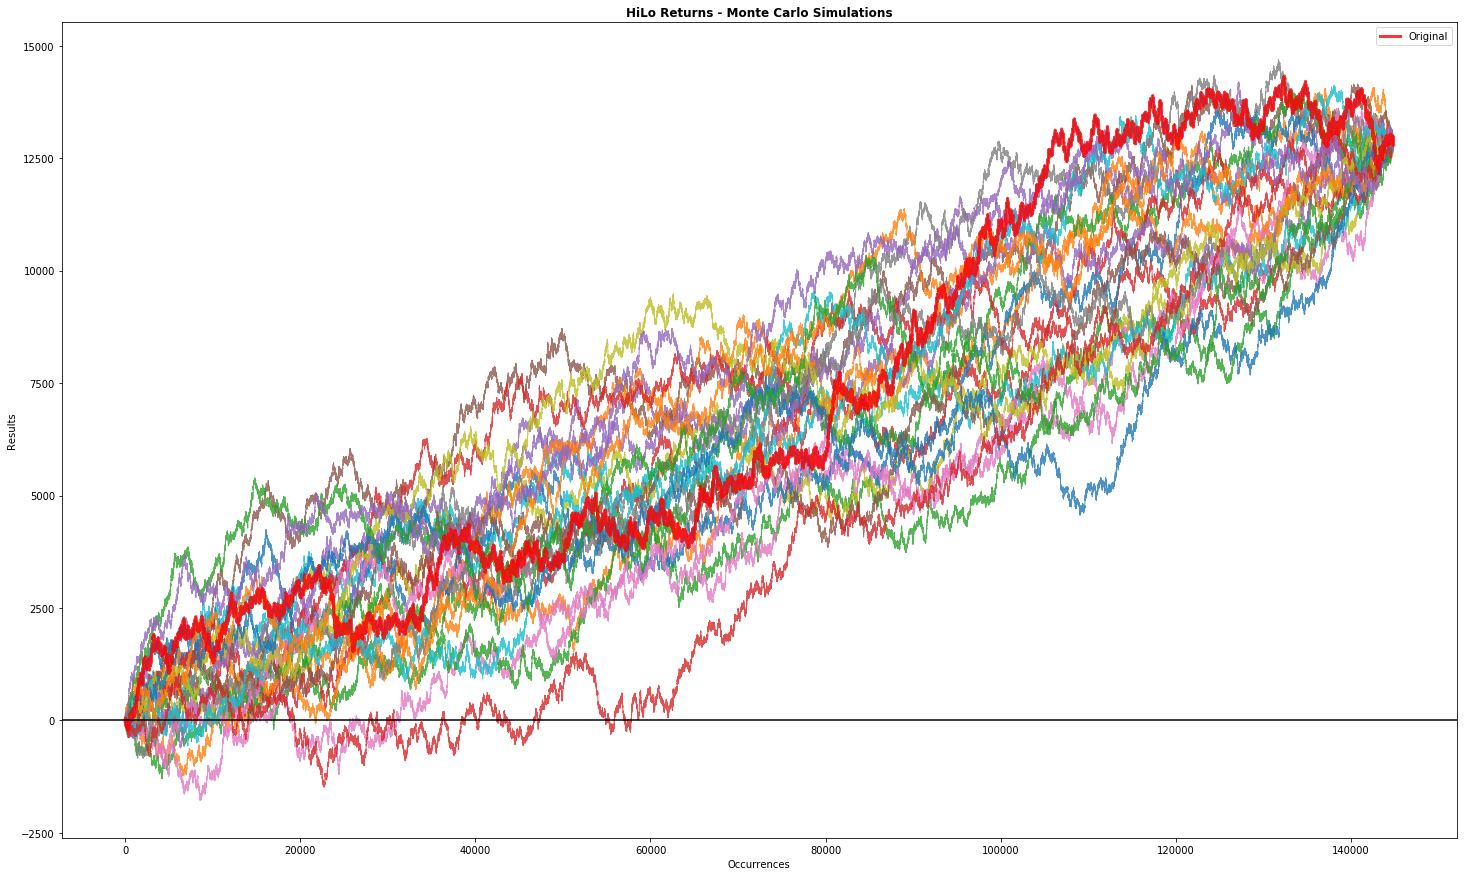

In [44]:
mc.plot(title="HiLo Returns - Monte Carlo Simulations", figsize=(25, 15))